In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# want to investigate time series relations of StackOverflow questions regarding Python over time


# Load time series data
stack_overfl_qs = pd.read_csv('StackOverflowData.csv')
stack_overfl_qs.head()



,month,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,...,Plato,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
0,09-Jan,0,0,0,631,8,6,2,19,8,...,0,1,0,0,5,0,0,5,0,0
1,09-Feb,1,0,0,633,9,7,3,27,4,...,0,0,0,0,5,0,0,11,0,0
2,09-Mar,0,0,0,766,4,4,2,24,3,...,0,0,0,0,7,0,0,2,0,0
3,09-Apr,0,0,0,768,12,6,3,32,10,...,0,0,0,0,11,0,0,5,0,0
4,09-May,1,0,0,1003,2,7,2,42,7,...,0,0,0,0,10,0,0,3,0,0


In [23]:
stack_overfl_qs['month'] = pd.to_datetime(stack_overfl_qs['month'], format="%y-%b")
print(stack_overfl_qs.head())
timeseries = stack_overfl_qs[['month', 'python']]

timeseries.set_index('month', inplace = True)
timeseries = timeseries.dropna()

timeseries.head()

       month  nltk  spacy  stanford-nlp  python   r  numpy  scipy  matlab  \
0 2009-01-01     0      0             0     631   8      6      2      19   
1 2009-02-01     1      0             0     633   9      7      3      27   
2 2009-03-01     0      0             0     766   4      4      2      24   
3 2009-04-01     0      0             0     768  12      6      3      32   
4 2009-05-01     1      0             0    1003   2      7      2      42   

   machine-learning  ...  Plato  Sympy  Flair  stanford-nlp.1  pyqt  Nolearn  \
0                 8  ...      0      1      0               0     5        0   
1                 4  ...      0      0      0               0     5        0   
2                 3  ...      0      0      0               0     7        0   
3                10  ...      0      0      0               0    11        0   
4                 7  ...      0      0      0               0    10        0   

   Lasagne  OCR  Apache-spark-mlib  azure-virtual-machin

,python
month,
2009-01-01,631
2009-02-01,633
2009-03-01,766
2009-04-01,768
2009-05-01,1003


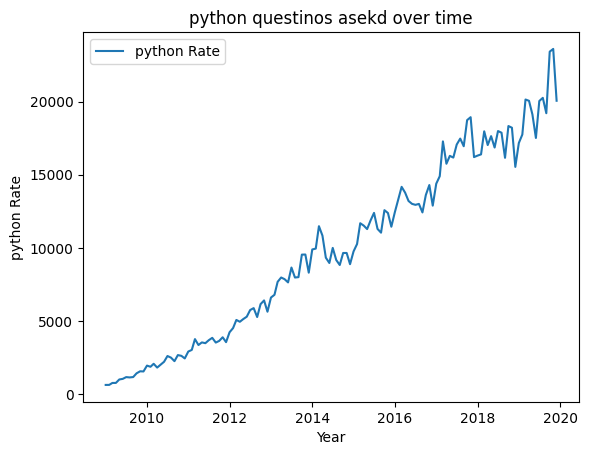

In [24]:
# visualize the time series
plt.plot(timeseries['python'], label='python Rate')
plt.xlabel('Year')
plt.ylabel('python Rate')
plt.legend()
plt.title('python questinos asekd over time')
plt.show();

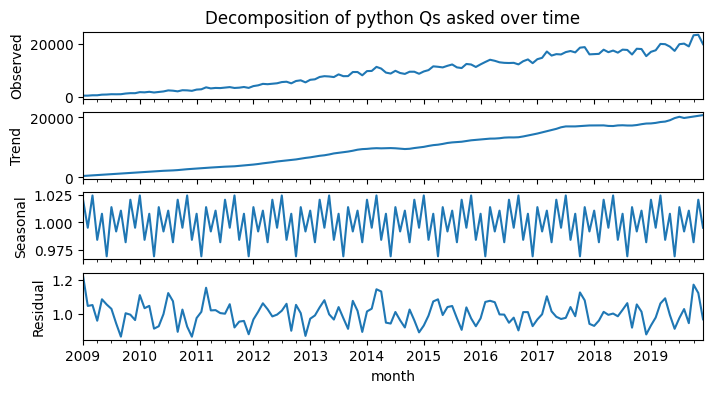

In [25]:
# Checking out the decompositions
from statsmodels.tsa.seasonal import seasonal_decompose

# setting the period makes the assumption that the seasonal trend should happen every "period" units (e.g. 10 years, or 5 days)
# can change model='multiplicative' to see if there's a change in seasonal trend
decomp1 = seasonal_decompose(timeseries['python'], period=10, model='multiplicative', extrapolate_trend='freq')
decomp2 = seasonal_decompose(timeseries['python'], period=5, model='additive', extrapolate_trend='freq')

fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(8,4))
ax[0].set_title('Decomposition of python Qs asked over time')
decomp1.observed.plot(ax=ax[0], legend=False)
ax[0].set_ylabel('Observed')

decomp1.trend.plot(ax=ax[1], legend=False)
ax[1].set_ylabel('Trend')

decomp1.seasonal.plot(ax=ax[2], legend=False)
ax[2].set_ylabel('Seasonal')

decomp1.resid.plot(ax=ax[3], legend=False)
ax[3].set_ylabel('Residual')

plt.show();

In [26]:
for i in range(1, 11):
    timeseries[f'Lag {i}'] = timeseries['python'].shift(i)

# there will be some missing values for the early years, since we don't have (e.g.) 1870 to predict 1871
# this means (with a maximum lag of 10 to investigate) we lost years 1871-1880:
strikeout = timeseries.dropna()
strikeout.head()

,python,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7,Lag 8,Lag 9,Lag 10
month,,,,,,,,,,,
2009-11-01,1562,1424.0,1169.0,1143.0,1165.0,1046.0,1003.0,768.0,766.0,633.0,631.0
2009-12-01,1552,1562.0,1424.0,1169.0,1143.0,1165.0,1046.0,1003.0,768.0,766.0,633.0
2010-01-01,1952,1552.0,1562.0,1424.0,1169.0,1143.0,1165.0,1046.0,1003.0,768.0,766.0
2010-02-01,1872,1952.0,1552.0,1562.0,1424.0,1169.0,1143.0,1165.0,1046.0,1003.0,768.0
2010-03-01,2076,1872.0,1952.0,1552.0,1562.0,1424.0,1169.0,1143.0,1165.0,1046.0,1003.0


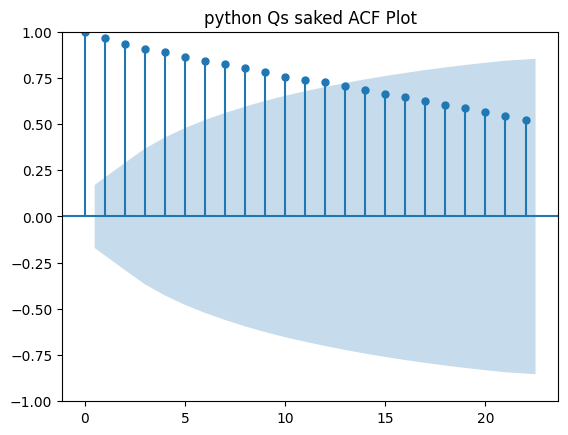

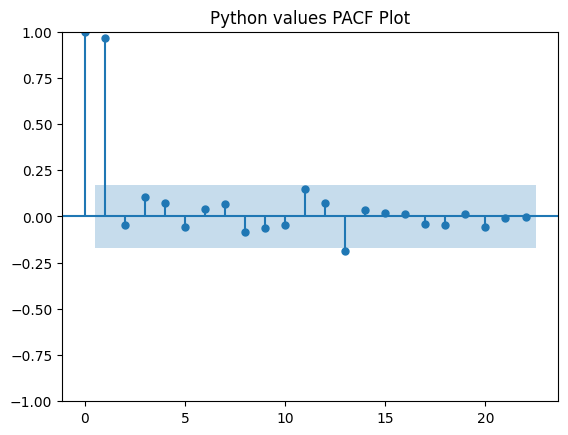

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# use the original data
series = timeseries['python']
plot_acf(series, title = 'python Qs saked ACF Plot')
plt.show();
# Looks like even up to a lag of 10 could provide significant information about the ensuing years

plot_pacf(series, title = 'Python values PACF Plot')
plt.show()

AR model should be used because after 2 lags, there a sharp cutoff in the PACF plot, while the ACF plot decreases gradually. 

In [28]:
train_size = int(.8 * len(timeseries))
train_data = timeseries[:train_size]
test_data = timeseries[train_size:]

# put the y feature (the current SO9) in arrays
y_train = np.array(train_data['python']).reshape(-1,1)
y_test = np.array(test_data['python']).reshape(-1,1)

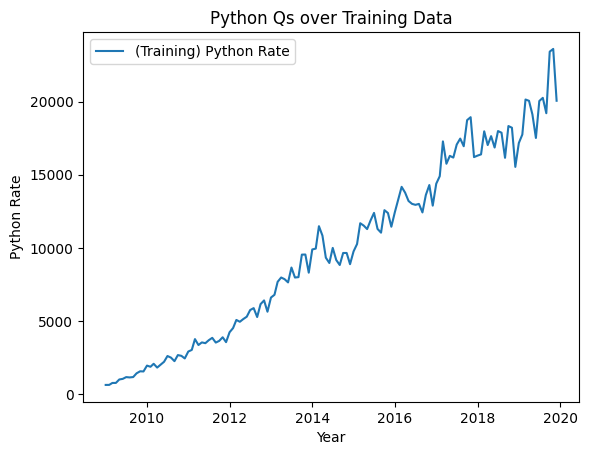

In [29]:
# visualize the time series
plt.plot(timeseries['python'], label='(Training) Python Rate')
plt.xlabel('Year')
plt.ylabel('Python Rate')
plt.legend()
plt.title('Python Qs over Training Data')
plt.show();

In [36]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.api import AutoReg

# lag 2 because it cuts off after lag 2 in the PACF plots
ar_model = AutoReg(y_train, lags=10, trend='n') # the default is to add an intercept (or, trend='c'), 
# using trend='n' is more in line with traditional AR(p) models, but may result in a nonstationary model
ar_results = ar_model.fit()

ar_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  105
Model:                    AutoReg(10)   Log Likelihood                -748.784
Method:               Conditional MLE   S.D. of innovations            640.979
Date:                Sun, 06 Apr 2025   AIC                           1519.568
Time:                        10:39:05   BIC                           1547.660
Sample:                            10   HQIC                          1530.919
                                  105                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y.L1           0.6400      0.103      6.239      0.000       0.439       0.841
y.L2           0.0853      0.123      0.693      0.488      -0.156       0.326
y.L3           0.1685      0.122      1.381      0.167      -0.071       0.408
y.L4           0.2062      0.123      1.670      0.095      -0.036       0.448
y.L5          -0.1278      0.125     -1.020      0.308      -0.374       0.118
y.L6          -0.0783      0.127     -0.618      0.537      -0.327       0.170
y.L7          -0.0439      0.140     -0.314      0.754      -0.318       0.230
y.L8           0.1433      0.137      1.049      0.294      -0.125       0.411
y.L9           0.1026      0.139      0.738      0.460      -0.170       0.375
y.L10         -0.0589      0.120     -0.489      0.625      -0.295       0.177
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.3373           -0.3370j            1.3791           -0.4607
AR.2            -1.3373           +0.3370j            1.3791            0.4607
AR.3            -0.7023           -1.1021j            1.3068           -0.3403
AR.4            -0.7023           +1.1021j            1.3068            0.3403
AR.5             0.0963           -1.1327j            1.1368           -0.2365
AR.6             0.0963           +1.1327j            1.1368            0.2365
AR.7             0.9828           -0.0000j            0.9828           -0.0000
AR.8             1.0697           -0.7055j            1.2814           -0.0928
AR.9             1.0697           +0.7055j            1.2814            0.0928
AR.10            2.5050           -0.0000j            2.5050           -0.0000
------------------------------------------------------------------------------
"""

In [37]:
ar_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
pred_data2 = pd.DataFrame({'Year': test_data.index, 'pred Python Qs': ar_pred.flatten()})
pred_data2.set_index('Year', inplace = True)
pred_data2.head()

,pred Python Qs
Year,
2017-10-01,17324.537843
2017-11-01,18117.943128
2017-12-01,18520.233043
2018-01-01,18464.392951
2018-02-01,18798.305554


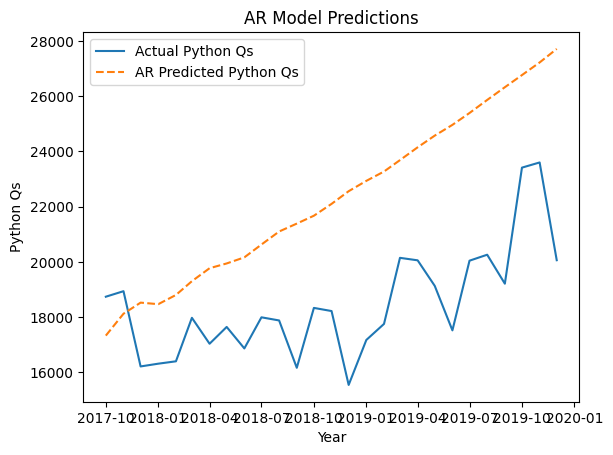

In [38]:
plt.plot(test_data['python'], label = 'Actual Python Qs')
plt.plot(pred_data2['pred Python Qs'], label = 'AR Predicted Python Qs', linestyle = '--')
plt.xlabel('Year')
plt.ylabel('Python Qs')
plt.legend()
plt.title('AR Model Predictions')
plt.show();

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

ar_pred = ar_results.predict(start=0, end=len(train_data) + len(test_data) - 1)
ar_pred = ar_pred.reshape(-1,1)
ar_pred = ar_pred[~np.isnan(ar_pred)]
y_test = y_test[~np.isnan(y_test)]

print(y_test[:10].shape)
print(ar_pred[:10].shape)
mae = mean_absolute_error(y_test[:10], ar_pred[:10])
rmse = np.sqrt(mean_squared_error(y_test[:10], ar_pred[:10]))
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

(10,)
(10,)
Mean Absolute Error: 15567.88
Root Mean Squared Error: 15603.95


Results are pretty bad, so try ARIMA model

In [62]:
from statsmodels.tsa.arima.model import ARIMA
arma_model = ARIMA(y_train, order=(2, 0, 2))
arma_results = arma_model.fit()

#summary of the model
arma_results.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  105
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -835.379
Date:                Sun, 06 Apr 2025   AIC                           1682.758
Time:                        10:51:16   BIC                           1698.682
Sample:                             0   HQIC                          1689.210
                                - 105                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7643.5813   6.11e-07   1.25e+10      0.000    7643.581    7643.581
ar.L1         -0.0025      0.014     -0.178      0.859      -0.030       0.025
ar.L2          0.9975      0.014     73.618      0.000       0.971       1.024
ma.L1          0.7981      0.161      4.944      0.000       0.482       1.115
ma.L2         -0.2016      0.098     -2.059      0.039      -0.393      -0.010
sigma2      4.555e+05   3.44e-07   1.33e+12      0.000    4.55e+05    4.55e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                 6.11
Prob(Q):                              0.51   Prob(JB):                         0.05
Heteroskedasticity (H):              11.49   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.62e+27. Standard errors may be unstable.
"""

In [63]:
arma_pred = arma_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
pred_data = pd.DataFrame({'Year': test_data.index, 'python': arma_pred.flatten()})
pred_data.set_index('Year', inplace = True)
pred_data.head()

,python
Year,
2017-10-01,16876.508293
2017-11-01,17002.999039
2017-12-01,16829.762497
2018-01-01,16956.370604
2018-02-01,16783.251468


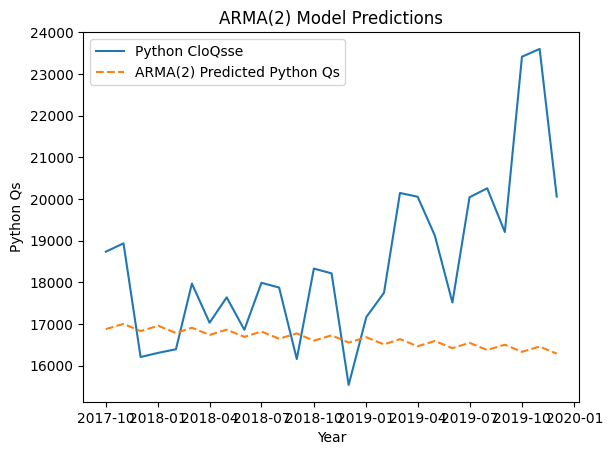

In [64]:
plt.plot(test_data['python'], label = 'Python CloQsse')
plt.plot(pred_data['python'], label = 'ARMA(2) Predicted Python Qs', linestyle = '--')
plt.xlabel('Year')
plt.ylabel('Python Qs')
plt.legend()
plt.title('ARMA(2) Model Predictions')
plt.show();